In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Step 1: Load the test data (features) from the file 'x_test.npy'
data = np.load('x_test.npy')

# Step 2: Load the test labels from the file 't_test.npy'
labels = np.load('t_test.npy')

# Reshaping the data to match the expected input shape for the model (300x300 RGB image)
data = data[:,:].reshape(data.shape[0],300,300,3)

# Normalizing the data by dividing by 255, converting to float16 to save memory
data = data.astype('float16') / 255

# Converting the labels to one-hot encoded format with 10 classes
labels = tf.keras.utils.to_categorical(labels, num_classes=10)

In [3]:
# Step 3: Define the path to the saved model checkpoint (best_model.h5)
checkpoint_path = 'best_model.h5'

# Getting the directory path of the checkpoint
checkpoint_dir = os.path.dirname(checkpoint_path)

# Note: Make sure to have the weights downloaded on your path with the name best_model.h5
# Loading the model from the specified checkpoint path
model = load_model(checkpoint_path)

2023-08-07 21:45:38.202894: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 21:45:38.759113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:bd:00.0, compute capability: 8.0


In [4]:
# Using the loaded model to predict the class labels for the test data
# The argmax function is used to get the index of the maximum value along axis 1, representing the predicted class
y = np.argmax(model.predict(data),axis=1)

2023-08-07 21:45:45.057075: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-08-07 21:45:47.343961: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [5]:
# Displaying the predicted labels (y)
y

array([9, 1, 2, ..., 6, 9, 4])



TEST
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       175
           1       0.94      0.87      0.90       182
           2       0.98      0.95      0.97       175
           3       0.94      0.95      0.94       189
           4       0.98      0.98      0.98       195
           5       0.94      0.97      0.95       161
           6       0.95      0.95      0.95       175
           7       0.97      0.98      0.97       175
           8       0.95      0.96      0.96       173
           9       0.94      0.92      0.93       180

    accuracy                           0.95      1780
   macro avg       0.95      0.95      0.95      1780
weighted avg       0.95      0.95      0.95      1780



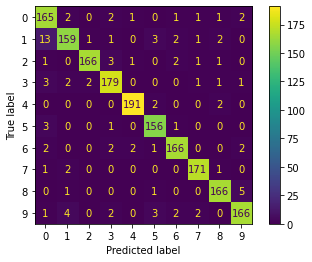

In [6]:
# Printing a header for the test results
print('\n\nTEST') # Note 1

# Printing the classification report, including metrics like precision, recall, f1-score, support, and accuracy
print(classification_report(np.argmax(labels,axis=1), y))

# Creating and plotting the confusion matrix to visualize the correctly and incorrectly classified samples
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.argmax(labels,axis=1), y))
disp_test.plot()